# Dataset creation

In [1]:
"""
Install requirements
"""

!pip3 install -r requirements.txt
!pip3 install prettytable

  Using cached dm_control2gym-0.0.2-py3-none-any.whl (12 kB)
^C
ERROR: Operation cancelled by user


In [1]:
"""
Imports external and own libraries
"""

import pickle
import numpy as np

import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader

from collections import Counter
from matplotlib import pyplot as plt

from prettytable import PrettyTable

# own
import common.action as action
import common.world as world
import common.plot as plot
import common.preprocess as preprocess
import common.nets as nets
import common.train as train
import common.tools as tools

/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, '__version__') or LooseVersion(tensorboard.__version__) < LooseVersion('1.15'):


### Example to show the MiniWorld Environment

Falling back to num_samples=4
Falling back to non-multisampled frame buffer
Falling back to num_samples=4
Falling back to non-multisampled frame buffer


<Figure size 1440x396 with 0 Axes>

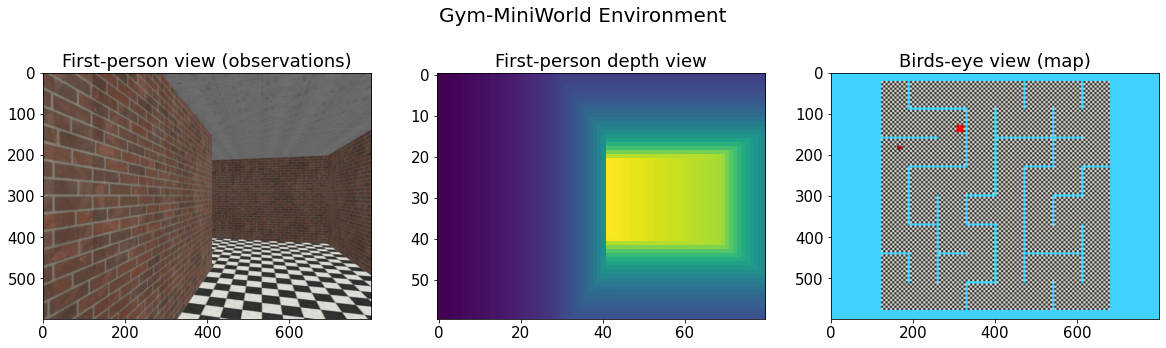

Agent variables
• current-pos: (2.16, 0.00, 7.49)
• current-angle: 14
• steps: 0
• observation-space: Box(0, 255, (60, 80, 3), uint8)
• action-space: Discrete(3)
Falling back to num_samples=4
Falling back to non-multisampled frame buffer
Falling back to num_samples=4
Falling back to non-multisampled frame buffer


/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/gym/utils/seeding.py:47: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  deprecation(


<Figure size 1440x396 with 0 Axes>

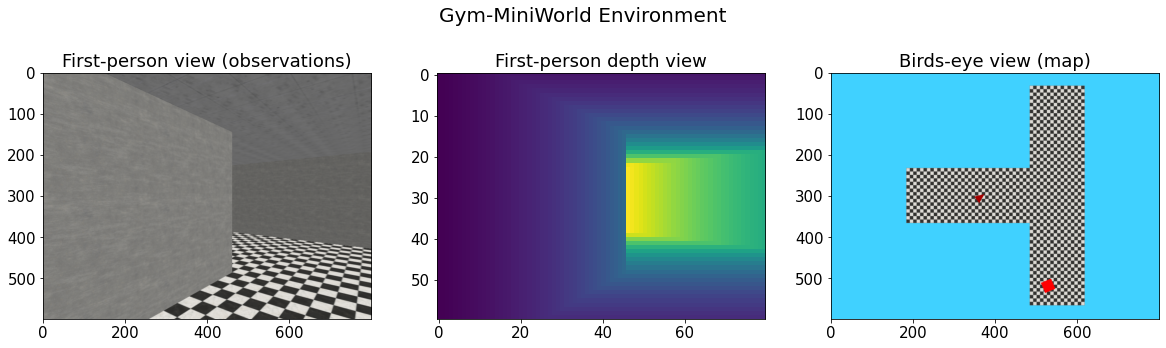

Agent variables
• current-pos: (4.37, 0.00, 0.14)
• current-angle: 37
• steps: 0
• observation-space: Box(0, 255, (60, 80, 3), uint8)
• action-space: Discrete(3)


In [4]:
"""
Create and visualize the world
"""
env = world.init_env("MiniWorld-Maze-v0")
plot.plot_obs_top_dep(env)
world.print_env_parameters(env)

env = world.init_env("MiniWorld-TMaze-v0")
plot.plot_obs_top_dep(env)
world.print_env_parameters(env)

### Create datasets within the large Maze

In [ ]:
"""
(1) Create Oracle dataset
"""
oracle_actions = action.oracle_actions()
env = world.init_env("MiniWorld-Maze-v0")
oracle_data = collector.collect(oracle_actions, env, img_size=32, show=False)

with open("datasets/oracle_data.pickle", "wb") as handle:
    pickle.dump(oracle_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

"""
(2) Create Oracle + reversed dataset
"""
oracle_actions = action.oracle_actions()
env = world.init_env("MiniWorld-Maze-v0")
reversed_actions = action.reverse_action_seq(oracle_actions)
oracle_reversed_data = collector.collect(
    oracle_actions + reversed_actions, env, img_size=32, show=False
)

with open("datasets/oracle_reversed_data.pickle", "wb") as handle:
    pickle.dump(oracle_reversed_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

"""
(3) Create Oracle dataset with random actions inbetween
"""
env = world.init_env("MiniWorld-Maze-v0")
oracle_random_actions = action.add_randomness(oracle_actions, env)
oracle_random_data = collector.collect(
    oracle_random_actions, env, img_size=32, show=False
)

with open("datasets/oracle_random_data.pickle", "wb") as handle:
    pickle.dump(oracle_random_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

"""
(4) Create Oracle dataset with random actions inbetween + reversed
"""
oracle_actions = action.oracle_actions()
env = world.init_env("MiniWorld-Maze-v0")
oracle_random_actions = action.add_randomness(oracle_actions, env)
reversed_actions = action.reverse_action_seq(oracle_random_actions)
oracle_reversed_random_data = collector.collect(
    oracle_random_actions + reversed_actions, env, img_size=32, show=False
)

with open("datasets/oracle_reversed_random_data.pickle", "wb") as handle:
    pickle.dump(oracle_reversed_random_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

"""
(5) Create shortend Oracle dataset with random actions inbetween + reversed 
"""
oracle_actions = action.oracle_actions()
env = world.init_env("MiniWorld-Maze-v0")
oracle_random_actions = action.add_randomness(
    oracle_actions[0:500], env, random_step_lenth=1
)
reversed_actions = action.reverse_action_seq(oracle_random_actions)
oracle_reversed_random_data_small = collector.collect(
    oracle_random_actions + reversed_actions, env, img_size=32, show=False
)

with open("datasets/oracle_reversed_random_data_small.pickle", "wb") as handle:
    pickle.dump(
        oracle_reversed_random_data_small, handle, protocol=pickle.HIGHEST_PROTOCOL
    )

"""
(6) Create Random dataset
"""
env = world.init_env("MiniWorld-Maze-v0")
random_act = action.random_actions(5000, env)
random_data = collector.collect(random_act, env, img_size=32, show=False)

with open("datasets/random_data.pickle", "wb") as handle:
    pickle.dump(random_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Create datasets within the TMaze

In [ ]:
"""
(7) Create Random dataset
"""
env = world.init_env("MiniWorld-TMaze-v0")
random_seq = action.random_actions(2000, env)
tmaze_random_data = collector.collect(random_seq, env, img_size=32, show=False)

with open("datasets/tmaze_random_data.pickle", "wb") as handle:
    pickle.dump(tmaze_random_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

"""
(8) Create Random dataset
"""

env = world.init_env("MiniWorld-TMaze-v0")
tmaze_random_reverse_data = collector.collect(actions, env, img_size=32, show=False)

with open("datasets/tmaze_random_reverse_data.pickle", "wb") as handle:
    pickle.dump(tmaze_random_reverse_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load datasets

In [6]:
"""
Load data with pickle (deserialize)
"""

"""
(1) Load Oracle dataset
"""
with open("datasets/oracle_data.pickle", "rb") as handle:
    oracle_data = pickle.load(handle)

"""
(2) Load Oracle + reversed dataset
"""
with open("datasets/oracle_reversed_data.pickle", "rb") as handle:
    oracle_reversed_data = pickle.load(handle)

"""
(3) Load Oracle dataset with random actions inbetween
"""
with open("datasets/oracle_random_data.pickle", "rb") as handle:
    oracle_random_data = pickle.load(handle)

"""
(4) Load Oracle dataset with random actions inbetween + reversed
"""
with open("datasets/oracle_reversed_random_data.pickle", "rb") as handle:
    oracle_reversed_random_data = pickle.load(handle)

"""
(5) Load Oracle dataset with random actions inbetween + reversed
"""
with open("datasets/oracle_reversed_random_data_small.pickle", "rb") as handle:
    oracle_reversed_random_data_small = pickle.load(handle)

"""
(6) Load Random dataset (random walk on the large map)
"""
with open("datasets/random_data.pickle", "rb") as handle:
    random_data = pickle.load(handle)

"""
(7) Load Random dataset (random walk on the large map)
"""
with open("datasets/tmaze_random_data.pickle", "rb") as handle:
    tmaze_random_data = pickle.load(handle)

"""
(8) Load Random dataset (random walk on the large map)
"""
with open("datasets/tmaze_random_reverse_data.pickle", "rb") as handle:
    tmaze_random_reverse_data = pickle.load(handle)

print("done")

done


### Example to visualize the data contained in each dataset

dict_keys(['actions', 'positions', 'angles', 'observations', 'top_views', 'depth_imgs'])


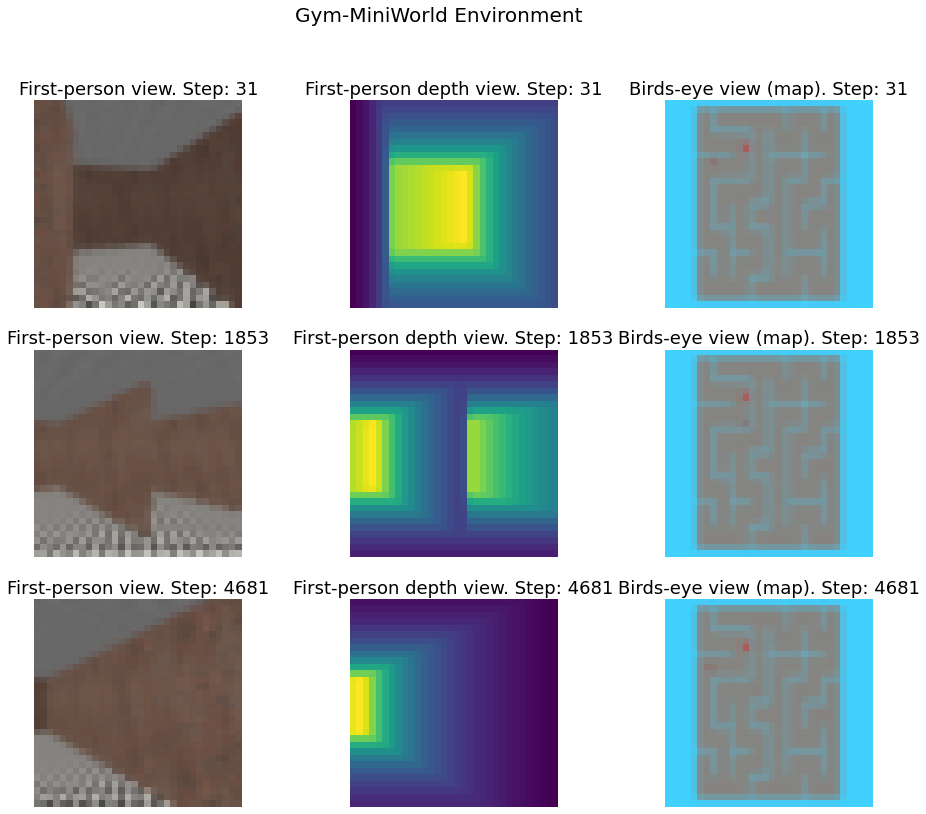

In [7]:
print(random_data.keys())
plot.plot_3x3_examples(random_data)

In [ ]:
"""
Use Turtle to plot the agents trajectory. 
A gif making function
"""

oracle_actions = action.oracle_actions()
plot.turtle_tracing(oracle_actions)
plot.save_gif_of_sequence(oracle_actions)

### Compare datasets

In [8]:
"""
Compare different datasets
"""

# print(str(count_actions(oracle_reversed_random_data)))

print("Large environment")
myTable = PrettyTable(["Dataset Name", "Length", "Distribution", "Environment"])
myTable.align["Dataset Name"] = "l"
myTable.add_row(
    [
        "Oracle data",
        len(oracle_data["actions"]),
        str(tools.count_actions(oracle_data)),
        "MiniWorld-Maze-v0",
    ]
)
myTable.add_row(
    [
        "Oracle data + reversed",
        len(oracle_reversed_data["actions"]),
        str(tools.count_actions(oracle_reversed_data)),
        "MiniWorld-Maze-v0",
    ]
)
myTable.add_row(
    [
        "Oracle data + random",
        len(oracle_random_data["actions"]),
        str(tools.count_actions(oracle_random_data)),
        "MiniWorld-Maze-v0",
    ]
)
myTable.add_row(
    [
        "Oracle data + random + reversed",
        len(oracle_reversed_random_data["actions"]),
        str(tools.count_actions(oracle_reversed_random_data)),
        "MiniWorld-Maze-v0",
    ]
)
myTable.add_row(
    [
        "Oracle small data + random + reversed",
        len(oracle_reversed_random_data_small["actions"]),
        str(tools.count_actions(oracle_reversed_random_data_small)),
        "MiniWorld-Maze-v0",
    ]
)
myTable.add_row(
    [
        "Random",
        len(random_data["actions"]),
        str(tools.count_actions(random_data)),
        "MiniWorld-Maze-v0",
    ]
)
print(myTable, "\n")

print("TMaze environment")
myTable = PrettyTable(["Dataset Name", "Length", "Distribution", "Environment"])
myTable.align["Dataset Name"] = "l"
myTable.add_row(
    [
        "Random exporation forwards",
        len(tmaze_random_data["actions"]),
        str(tools.count_actions(tmaze_random_data)),
        "MiniWorld-TMaze-v0",
    ]
)
myTable.add_row(
    [
        "Random exporation forwards+backwards",
        len(tmaze_random_reverse_data["actions"]),
        str(tools.count_actions(tmaze_random_reverse_data)),
        "MiniWorld-TMaze-v0",
    ]
)
print(myTable)

Large environment
+---------------------------------------+--------+--------------------------+-------------------+
| Dataset Name                          | Length |       Distribution       |    Environment    |
+---------------------------------------+--------+--------------------------+-------------------+
| Oracle data                           |  1195  |      [90, 115, 990]      | MiniWorld-Maze-v0 |
| Oracle data + reversed                |  2390  |   [205, 205, 990, 990]   | MiniWorld-Maze-v0 |
| Oracle data + random                  |  8365  | [2478, 2503, 2187, 1197] | MiniWorld-Maze-v0 |
| Oracle data + random + reversed       | 16730  | [5041, 5041, 3324, 3324] | MiniWorld-Maze-v0 |
| Oracle small data + random + reversed |  3000  |   [738, 738, 762, 762]   | MiniWorld-Maze-v0 |
| Random                                |  5000  |    [1693, 1690, 1617]    | MiniWorld-Maze-v0 |
+---------------------------------------+--------+--------------------------+-------------------+ 



STEP 1 Amount unique classes:  4
 
STEP 2 Amount unique classes:  13
 
STEP 3 Amount unique classes:  22
 
STEP 4 Amount unique classes:  31
 
Overall amount of items: 2389
How often does the most common action occur? 990
Overall amount of items: 2389
How often does the most common action occur? 956
Overall amount of items: 2389
How often does the most common action occur? 922
Overall amount of items: 2389
How often does the most common action occur? 888


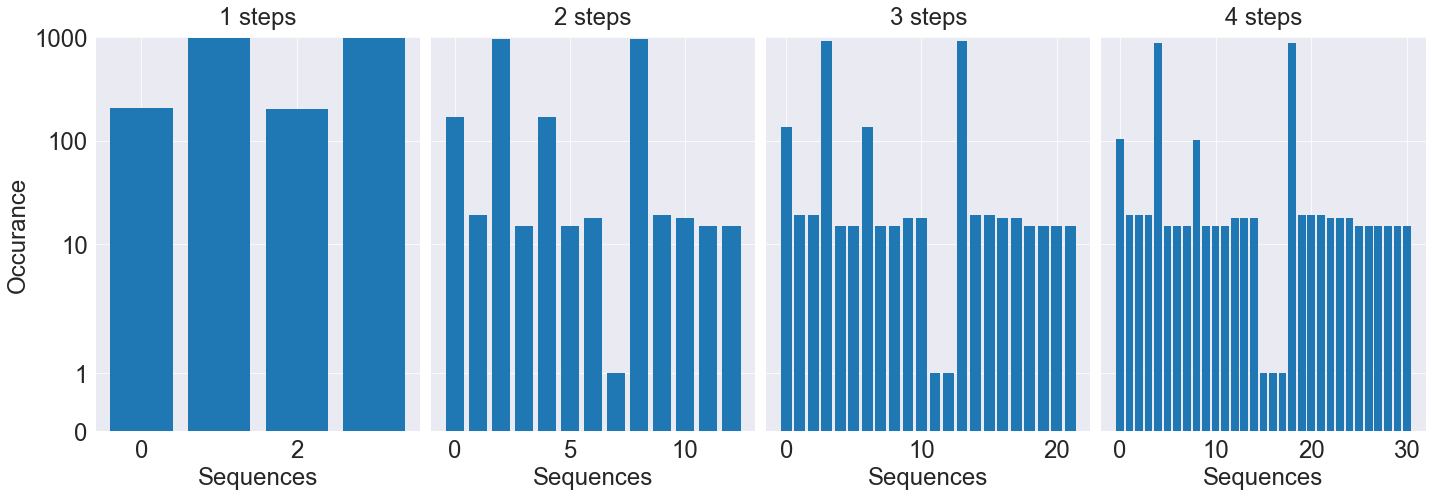

In [53]:
"""
Show the distributions for the different trajectory lengths (dataset diversity)
"""


def show_information(actions):

    for i in range(len(actions)):

        plt.subplot(1, 4, i + 1)
        count = Counter(actions[i])

        print("Overall amount of items:", len(actions[0]))
        print("How often does the most common action occur?", count[max(count)])

        font = 24
        hfont = {"fontname": "Helvetica"}

        plt.rcParams["figure.figsize"] = 20, 7
        plt.rcParams["axes.titlepad"] = 13
        plt.rcParams["xtick.major.pad"] = "8"  # axis distance
        plt.rcParams["ytick.major.pad"] = "8"

        plt.rc("xtick", labelsize=font)
        plt.rc("ytick", labelsize=font)

        plt.style.use("seaborn-darkgrid")

        with plt.style.context("seaborn-darkgrid"):

            plt.bar(range(len(count)), count.values(), color="tab:blue")
            string = str(i + 1) + " steps"
            plt.title(string, fontsize=font)
            plt.xlabel("Sequences", fontsize=font)

            plt.ylim(ymax=1000, ymin=0)
            plt.yscale("symlog")
            if i == 0:
                plt.style.use("seaborn-darkgrid")
                plt.yticks(visible=True)
                plt.ylabel("Occurance", fontsize=font)
                plt.yticks([0, 1, 10, 100, 1000], ["0", "1", "10", "100", "1000"])
            else:
                plt.yticks(visible=False)

    plt.tight_layout()
    plt.show()


collector = []
for i in range(1, 5):
    with open("datasets/oracle_reversed_data.pickle", "rb") as handle:
        oracle_reversed_random_data_small = pickle.load(handle)
    dataset = preprocess.split_n_steps_between(oracle_reversed_random_data_small, n=i)

    actions = []
    for element in dataset["actions"]:
        actions.append(str(element[:]))

    collector.append(actions)

    print("STEP", str(i), "Amount unique classes: ", len(set(actions)))
    print(" ")

show_information(collector)

In [47]:
with open("datasets/tmaze_random_reverse_data.pickle", "rb") as handle:
    dataset = pickle.load(handle)

maximum_0 = 0
maximum_1 = 0
for value in dataset["positions"]:
    maximum_0 = max(maximum_0, value[0])
    maximum_1 = max(maximum_1, value[2])

print(maximum_0)
print(maximum_1)

5.05886931644005
1.5989934999239532


In [39]:
import statistics

x_coords = []
y_coords = []

for value in dataset["positions"]:
    x_coords.append(value[0])
    y_coords.append(value[2])

# compute mean and median
x_mean = round(statistics.mean(x_coords), 3)
y_mean = round(statistics.mean(y_coords), 3)
x_median = round(statistics.median(x_coords), 3)
y_median = round(statistics.median(y_coords), 3)

print(f"x_mean {x_mean} y_mean {y_mean} x_median {x_median} y_median {y_median}")

# compute euclidean distance over all possible positions

x_mean 2.008 y_mean 0.718 x_median 2.024 y_median 0.737


In [40]:
res = 0

count = 0
for value in dataset["positions"]:
    count += 1
    res += ((x_median - value[0]) ** 2 + (y_median - value[2]) ** 2) ** 0.5
print(res / count)

res = 0

count = 0
for value in dataset["positions"]:
    count += 1
    res += ((x_mean - value[0]) ** 2 + (y_mean - value[2]) ** 2) ** 0.5
print(res / count)

1.7744048671073804
1.7738622217902602
